In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# import the data as a table
transactions_df = pd.read_csv("data/ethereum_transactions_20191201_20191203.csv")
print(transactions_df.shape)
transactions_df.head()

(1906807, 17)


,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_root,receipt_status,block_timestamp,block_number,block_hash
0,0x7dcd0bb8903653b3c145e293b76da46839b6dbd06bc7...,32,52,0xd0e83c5e18b2fefa6536ea324d411720e3918f12,0xbac6874fff7ac02c06907d0e340af9f1832e7908,0,67072,3600000256,0xa9059cbb0000000000000000000000004b678c63032b...,3721361,51594,NaN,NaN,1,2019-12-01 07:06:42 UTC,9031172,0xaf7bb1b8b6d66599d54ad02d2527d38fb4cbac8d0477...
1,0x026e4a9af1540fc8d4f0305b19f2da6b5f9ff68345da...,133,33,0xd0e83c5e18b2fefa6536ea324d411720e3918f12,0xbac6874fff7ac02c06907d0e340af9f1832e7908,0,67072,1440000000,0xa9059cbb00000000000000000000000061476e594d89...,3890781,51594,NaN,NaN,1,2019-12-01 18:40:41 UTC,9033838,0x47c3234dcbd8054e8dbeddd3a1518d59b2b2737dc688...
2,0x19e4c62b5f2e718d166b135948794468722f98142b35...,55,9,0x4881229b75ae7d6e37a3c870600ebb5dc2113c25,0xa61d50fdda5a80917c2b893266b5b5bb363de6f2,0,8000000,3200000000,0xad8733ca000000000000000000000000ac08809df104...,3729357,3381296,NaN,NaN,1,2019-12-01 22:37:36 UTC,9034769,0x5b12136e4ae616061946eebc5fbab3ff418c125d7a7d...
3,0x661f9dc0b7482e450aeab49e675e329a9c1cdbb57e0a...,7000,72,0x4d953115678b15ce0b0396bcf95db68003f86fb5,0x411995486801604d2b1e641a756938a6bfea60fb,0,334592,10000000001,0x6a7612020000000000000000000000008dd5fbce2f6a...,3229349,68493,NaN,NaN,1,2019-12-01 10:11:23 UTC,9031900,0xe4550e0c3ca94a95e4b54b9663242ba082133ded5c5c...
4,0xe0b9b994e8ef5556d85cdd08cdcf3082af5cdd2c339b...,9903,76,0x2e9ce539d7e316468dfa447685a8e761ba639c1f,0xb04239b53806ab31141e6cd47c63fb3480cac908,24000000000000000,800000,2100000000,0x81e2f252000000000000000000000000000000000000...,8668886,481563,NaN,NaN,1,2019-12-01 07:45:37 UTC,9031314,0x70fcd7e80d56cad0a3bbc3e1f968399200bfac5d2303...


In [3]:
transactions_df.sample(23)

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_root,receipt_status,block_timestamp,block_number,block_hash
949660,0x8f3eafa28a62ee216ffdfa6e49bcc8acebb7e05affd9...,0,1,0x6c264c2d4ea88d3db1dd769c813d052bfb04a222,0xdac17f958d2ee523a2206206994597c13d831ec7,0,58529,30000000000,0xa9059cbb000000000000000000000000d28feeb0d4be...,45920,23529,NaN,NaN,1,2019-12-03 15:46:46 UTC,9044499,0xdb9ea52dc618ac9309e3627305d0f522fa51a87dbe7a...
684842,0x9176cde776f69808cd877acc646677e73a86cbbfe8a8...,11,29,0x0b754761bef25fa3369765fff2eaac489f5d4435,0x9e15f8ad98e95033c1d4798458cec34a4b5972b0,0,60000,22000000000,0xa9059cbb00000000000000000000000076a2c3f6ca88...,923358,44541,NaN,NaN,1,2019-12-02 02:46:29 UTC,9035735,0xa5079cc89fe3c7668751c7856194dc46856ef1adc137...
1206354,0x669e5807e858e994dc23cba5f320a67d4967fe2ca1f9...,757,153,0x9dc24b5fb1907fa3439bea0de639d56773b7e7de,0xdac17f958d2ee523a2206206994597c13d831ec7,0,60000,25387963393,0xa9059cbb00000000000000000000000032ddaf296890...,5093952,53401,NaN,NaN,1,2019-12-01 06:23:57 UTC,9031015,0x528de255c9bedddaa4489daf8f42638422facc7314fe...
1527003,0xf8814f3d1eee08a7fa785866d639fb91e37457427b1c...,129,140,0xfa61ea7dc3658b01d708a85e77d3c2d4d0349adc,0xd7b9a9b2f665849c4071ad5af77d8c76aa30fb32,100044203141047657,21000,3600000000,0x,7809944,21000,NaN,NaN,1,2019-12-03 13:48:48 UTC,9043997,0x21508f9644b5af9fcb72487f66dcff4bf9f074ef5490...
846902,0xaf97a4b7403c6c77cc095b3cca21a45a1c208398e0af...,17,153,0x7c266d420d4aea18881a678af6c0461d319d2fda,0xdac17f958d2ee523a2206206994597c13d831ec7,0,38465,4400000000,0xa9059cbb000000000000000000000000c97a4ed29f03...,6864516,23465,NaN,NaN,1,2019-12-01 06:26:47 UTC,9031021,0x0a4b6610133cb06435389a14fb904fad2d73f1c5147f...
1431674,0x1d73d4bae05e23f0c873e89cee3057bd90f0e965ca6f...,328,194,0x293933b1c8918f67b4498a07f97ef5f215b099bf,0xa986d69f2700765e22f6ff2156b9bab1a689d704,2000000000000000,80000,20000000000,0x,5821641,21000,NaN,NaN,1,2019-12-01 09:40:13 UTC,9031769,0x081bffe0e0eef514ca90da9bb3a6aa841dab702dc6a8...
1454385,0x50f5d8680e3f0b47aeb7de09df7252c4e8a503b613cf...,48857,25,0xf509accd096a82ef2562d316669d0aa4b60f3796,0x6500f2ce526c1ad82eba929dd3bfb470d1c6e88a,10000000000000000,31000,40000000000,0x,562049,21000,NaN,NaN,1,2019-12-02 20:58:39 UTC,9040053,0xdcf185e138302eaebb19059ba926968cc1d927eb5171...
795483,0x38562ec618c391fe312485d2ccbe1e426b73006904b8...,9656,90,0x51787a2c56d710c68140bdadefd3a98bff96feb4,0x425372c0ac9d559a186a08a3854e0ddea1a00d5c,0,260842,1010000000,0xb44848f5000000000000000000000000000000000000...,4361409,128540,NaN,NaN,1,2019-12-02 00:45:39 UTC,9035275,0xec536fe35cb5ebc4d590ad981d3349429d04749f4037...
263988,0x0ebdbbcc91d81a91cfdc43c647f04cd7388572c796d8...,1763236,9,0x564286362092d8e7936f0549571a803b203aaced,0xc7deeb68e8a6644b34c413b14f2da10cc8bbad21,8045936000000000000,21000,40000000000,0x,260739,21000,NaN,NaN,1,2019-12-02 13:10:31 UTC,9038217,0x8cad1661b325f9b18d128bd5b0d03633f5e6f47a03aa...
1643355,0xe195684362e7d4f89218438bcc21b5a03d80346d6df6...,14,129,0x52a4f2ff30ec4e9f880781bc7002d000cdbfbb23,0x63e95f8d07a1ec4176bb55d90abe3f8929a4b684,0,60000,1000000000,0xa9059cbb000000000000000000000000e7dff0e15cea...,9907171,37451,NaN,NaN,1,2019-12-02 15:38:27 UTC,9038805,0x4894f0590b7b2fa46cc1e7bd88117298a82bb1a75892...


In [4]:
transactions_df.describe(include='all')

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_root,receipt_status,block_timestamp,block_number,block_hash
count,1906807,1.906807e+06,1.906807e+06,1906807,1901239,1906807,1.906807e+06,1.906807e+06,1906807,1.906807e+06,1.906807e+06,5568,0.0,1.906807e+06,1906807,1.906807e+06,1906807
unique,1906807,NaN,NaN,447601,351457,315846,NaN,NaN,1017328,NaN,NaN,5568,NaN,NaN,16270,NaN,16270
top,0xeae104a0d444d58a5eaa1affb689f0fbbffa13b64a57...,NaN,NaN,0xf509accd096a82ef2562d316669d0aa4b60f3796,0xdac17f958d2ee523a2206206994597c13d831ec7,0,NaN,NaN,0x,NaN,NaN,0xbefbc72291d265d782a36a1266d1cefe12fdc2ec,NaN,NaN,2019-12-02 02:40:58 UTC,NaN,0x2d65b6eeb2e80d313bc3c8229c918e8d6c74b64a287d...
freq,1,NaN,NaN,40887,281713,1258837,NaN,NaN,580316,NaN,NaN,1,NaN,NaN,467,NaN,467
mean,NaN,8.043663e+05,7.927333e+01,NaN,NaN,NaN,1.933469e+05,1.511285e+10,NaN,4.255843e+06,6.972611e+04,NaN,NaN,9.850326e-01,NaN,9.037671e+06,NaN
std,NaN,3.677386e+06,5.926058e+01,NaN,NaN,NaN,5.631867e+05,3.779229e+10,NaN,3.080685e+06,2.327968e+05,NaN,NaN,1.214225e-01,NaN,4.708943e+03,NaN
min,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,2.100000e+04,0.000000e+00,NaN,1.316100e+04,1.316100e+04,NaN,NaN,0.000000e+00,NaN,9.029510e+06,NaN
25%,NaN,2.200000e+01,3.100000e+01,NaN,NaN,NaN,4.839450e+04,4.620000e+09,NaN,1.381105e+06,2.100000e+04,NaN,NaN,1.000000e+00,NaN,9.033384e+06,NaN
50%,NaN,1.990000e+03,6.800000e+01,NaN,NaN,NaN,7.161300e+04,1.009715e+10,NaN,3.863967e+06,3.674400e+04,NaN,NaN,1.000000e+00,NaN,9.037521e+06,NaN
75%,NaN,6.304500e+04,1.180000e+02,NaN,NaN,NaN,1.200000e+05,2.060000e+10,NaN,6.903249e+06,5.239100e+04,NaN,NaN,1.000000e+00,NaN,9.041902e+06,NaN


In [5]:
transactions_df.dtypes

hash                            object
nonce                            int64
transaction_index                int64
from_address                    object
to_address                      object
value                           object
gas                              int64
gas_price                        int64
input                           object
receipt_cumulative_gas_used      int64
receipt_gas_used                 int64
receipt_contract_address        object
receipt_root                   float64
receipt_status                   int64
block_timestamp                 object
block_number                     int64
block_hash                      object
dtype: object

In [6]:

transactions_df['value'] = transactions_df['value'].astype(float)
transactions_df['ether_value'] = transactions_df['value'] * (1/10**18)

In [7]:
transactions_df['block_timestamp'] = pd.to_datetime(transactions_df['block_timestamp'])

In [45]:
transactions_df.describe(include='all')

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_root,receipt_status,block_timestamp,block_number,block_hash,ether_value
count,1906807,1.906807e+06,1.906807e+06,1906807,1901239,1.906807e+06,1.906807e+06,1.906807e+06,1906807,1.906807e+06,1.906807e+06,5568,0.0,1.906807e+06,1906807,1.906807e+06,1906807,1.906807e+06
unique,1906807,NaN,NaN,447601,351457,NaN,NaN,NaN,1017328,NaN,NaN,5568,NaN,NaN,NaN,NaN,16270,NaN
top,0xeae104a0d444d58a5eaa1affb689f0fbbffa13b64a57...,NaN,NaN,0xf509accd096a82ef2562d316669d0aa4b60f3796,0xdac17f958d2ee523a2206206994597c13d831ec7,NaN,NaN,NaN,0x,NaN,NaN,0xbefbc72291d265d782a36a1266d1cefe12fdc2ec,NaN,NaN,NaN,NaN,0x2d65b6eeb2e80d313bc3c8229c918e8d6c74b64a287d...,NaN
freq,1,NaN,NaN,40887,281713,NaN,NaN,NaN,580316,NaN,NaN,1,NaN,NaN,NaN,NaN,467,NaN
mean,NaN,8.043663e+05,7.927333e+01,NaN,NaN,2.004233e+18,1.933469e+05,1.511285e+10,NaN,4.255843e+06,6.972611e+04,NaN,NaN,9.850326e-01,2019-12-02 10:53:22.655025664+00:00,9.037671e+06,NaN,2.004233e+00
min,NaN,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,2.100000e+04,0.000000e+00,NaN,1.316100e+04,1.316100e+04,NaN,NaN,0.000000e+00,2019-12-01 00:01:01+00:00,9.029510e+06,NaN,0.000000e+00
25%,NaN,2.200000e+01,3.100000e+01,NaN,NaN,0.000000e+00,4.839450e+04,4.620000e+09,NaN,1.381105e+06,2.100000e+04,NaN,NaN,1.000000e+00,2019-12-01 16:45:10+00:00,9.033384e+06,NaN,0.000000e+00
50%,NaN,1.990000e+03,6.800000e+01,NaN,NaN,0.000000e+00,7.161300e+04,1.009715e+10,NaN,3.863967e+06,3.674400e+04,NaN,NaN,1.000000e+00,2019-12-02 10:12:03+00:00,9.037521e+06,NaN,0.000000e+00
75%,NaN,6.304500e+04,1.180000e+02,NaN,NaN,9.000000e+15,1.200000e+05,2.060000e+10,NaN,6.903249e+06,5.239100e+04,NaN,NaN,1.000000e+00,2019-12-03 05:02:18+00:00,9.041902e+06,NaN,9.000000e-03
max,NaN,2.387817e+07,4.660000e+02,NaN,NaN,5.000000e+22,9.935732e+06,2.874207e+13,NaN,9.999997e+06,9.714415e+06,NaN,NaN,1.000000e+00,2019-12-03 23:59:45+00:00,9.046419e+06,NaN,5.000000e+04


In [9]:
 #lets see how many blocks there are, and about how many transactions are in each block

block_df = transactions_df.loc[:,['block_number','hash']].groupby('block_number').count().rename(columns={'hash':'count'})
print(f"Number of blocks: {block_df.shape[0]}")
block_df.sort_values(by='count', ascending=False).sample(22)

Number of blocks: 16270


,count
block_number,
9035229,178
9042374,108
9043269,107
9045172,137
9039293,69
9035017,34
9039207,113
9038625,204
9043423,61


In [18]:
block_number = 9033089
single_block_df = transactions_df.loc[transactions_df['block_number'] == block_number,:]
print(single_block_df.shape[0])
print(single_block_df['block_timestamp'].min())



214
2019-12-01 15:24:13+00:00


In [19]:
single_block_df.head()

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_root,receipt_status,block_timestamp,block_number,block_hash,ether_value
942,0x0845367fe97a97241945a19063ad908556bf691c61a1...,113988,125,0x3a9e6cf4e3157670a3b991c25d6f4fcbd9419c03,0xdac17f958d2ee523a2206206994597c13d831ec7,0.000000e+00,200000,38002223256,0xa9059cbb0000000000000000000000007c1b3e3980d9...,3941849,38465,NaN,NaN,1,2019-12-01 15:24:13+00:00,9033089,0x282d99f98ed7ae336dd06e89248b82da6d6b19160bcc...,0.000000
1642,0x7b605cc0e6a2fa5d8e1b7fde81f5b956a77f84aaed61...,1692088,137,0x2b5634c42055806a59e9107ed44d43c426e58258,0x0c963a1b52eb97c5e457c7d76696f8b95c3087ed,0.000000e+00,106086,32300000000,0xa9059cbb000000000000000000000000cfe8dd135810...,4490066,37391,NaN,NaN,1,2019-12-01 15:24:13+00:00,9033089,0x282d99f98ed7ae336dd06e89248b82da6d6b19160bcc...,0.000000
16093,0x01f24a9c89985b68390cf539b0b11bd8c3d06aa1b6a6...,24,204,0xfb06ceae4e309adbc009a7d14891b95ab191cc81,0xdac17f958d2ee523a2206206994597c13d831ec7,0.000000e+00,60000,21000000000,0xa9059cbb000000000000000000000000c693f395f359...,9179829,53401,NaN,NaN,1,2019-12-01 15:24:13+00:00,9033089,0x282d99f98ed7ae336dd06e89248b82da6d6b19160bcc...,0.000000
37243,0x5162a3dee1c287e9c084e15a5462402312f97fba644d...,23847300,17,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0xe65588dc1ae5ad1dd35b891fe6b4f12e79d9b3b2,5.013067e+16,50000,1000000000,0x,415075,21000,NaN,NaN,1,2019-12-01 15:24:13+00:00,9033089,0x282d99f98ed7ae336dd06e89248b82da6d6b19160bcc...,0.050131
37244,0x3de73212cf992eace1ac577066e19ded3df0828504fc...,23847287,4,0xea674fdde714fd979de3edf0f56aa9716b898ec8,0xbd26fb9b0032e6a0bae84beeb311c7d35eb8c1b6,1.000061e+18,50000,1000000000,0x,105051,21000,NaN,NaN,1,2019-12-01 15:24:13+00:00,9033089,0x282d99f98ed7ae336dd06e89248b82da6d6b19160bcc...,1.000061


In [20]:
# lets see if we can draw a block!

# obtain a list odf addresses
from_addresses = single_block_df['from_address'].unique()
to_addresses = single_block_df['to_address'].unique() 
all_addresses = [i for i in from_addresses] 
for i in to_addresses: 
    if i not in all_addresses:
        all_addresses.append(i)

print(len(all_addresses))
all_addresses[:2]

242


['0x3a9e6cf4e3157670a3b991c25d6f4fcbd9419c03',
 '0x2b5634c42055806a59e9107ed44d43c426e58258']

In [85]:
G = nx.DiGraph()

node_sizes = []
edge_colors = []

for i in all_addresses:
    if i not in list(G.nodes):
        # add the node if it isn't already in the list
        G.add_node(i)
        # create a temp df that includes all transactions where the given address
        # was either a sender or a recipient
        temp_df = single_block_df.loc[(single_block_df['from_address'] == i) | (single_block_df['to_address'] == i), :]
        # For this given node, lets make the size of it the size of the connections
        node_sizes.append(temp_df.shape[0])
        
        for index, row in temp_df.iterrows():
            # If it is the sender, check to make sure the receiver is a node.  If the reciever isn't, then add it
            if i == row['from_address']:
                if row['to_address'] not in list(G.nodes):
                    G.add_node(row['to_address'])

                    # add the size of the node
                    node_sizes.append(single_block_df.loc[(single_block_df['from_address'] == row['to_address']) | (single_block_df['to_address'] == row['to_address']), :].shape[0])
            
            # Do the same thing if the node is the receiver (make sure the sender node is added)
            else:
                if row['from_address'] not in list(G.nodes):
                    G.add_node(row['from_address'])
                    node_sizes.append(single_block_df.loc[(single_block_df['from_address'] == row['to_address']) | (single_block_df['to_address'] == row['to_address']), :].shape[0])
            # Add the edge
            G.add_edge(row['from_address'], row['to_address'])

            edge_colors.append(row['ether_value'])


quintiles = np.quantile([i for i in edge_colors if i != 0],[0.2*i for i in range(1,6)])
print(quintiles) 
new_edge_colors = []
for edge in edge_colors:
    if edge == 0:
        new_edge_colors.append("black") 
    elif (edge < quintiles[0]):
        new_edge_colors.append("lightblue")
    elif (edge >= quintiles[0])&(edge < quintiles[1]):
        new_edge_colors.append("blue")
    elif (edge >= quintiles[1])&(edge < quintiles[2]):
        new_edge_colors.append("turquoise")
    elif (edge >= quintiles[2])&(edge < quintiles[3]):
        new_edge_colors.append("darkblue")
    elif (edge >= quintiles[3])&(edge <= quintiles[4]):
        new_edge_colors.append("red")

node_sizes = [i**1.5 for i in node_sizes]

[1.00000000e-02 5.00786672e-02 1.00373318e-01 1.00214897e+00
 6.06990000e+02]


In [82]:
# lets get the edge colors and find the appropriate quantiles.

deciles



#edge_colors = ["black" if i == 0 else "red" for i in edge_colors]


array([1.00000000e-02, 5.00786672e-02, 1.00373318e-01, 1.00214897e+00,
       6.06990000e+02])

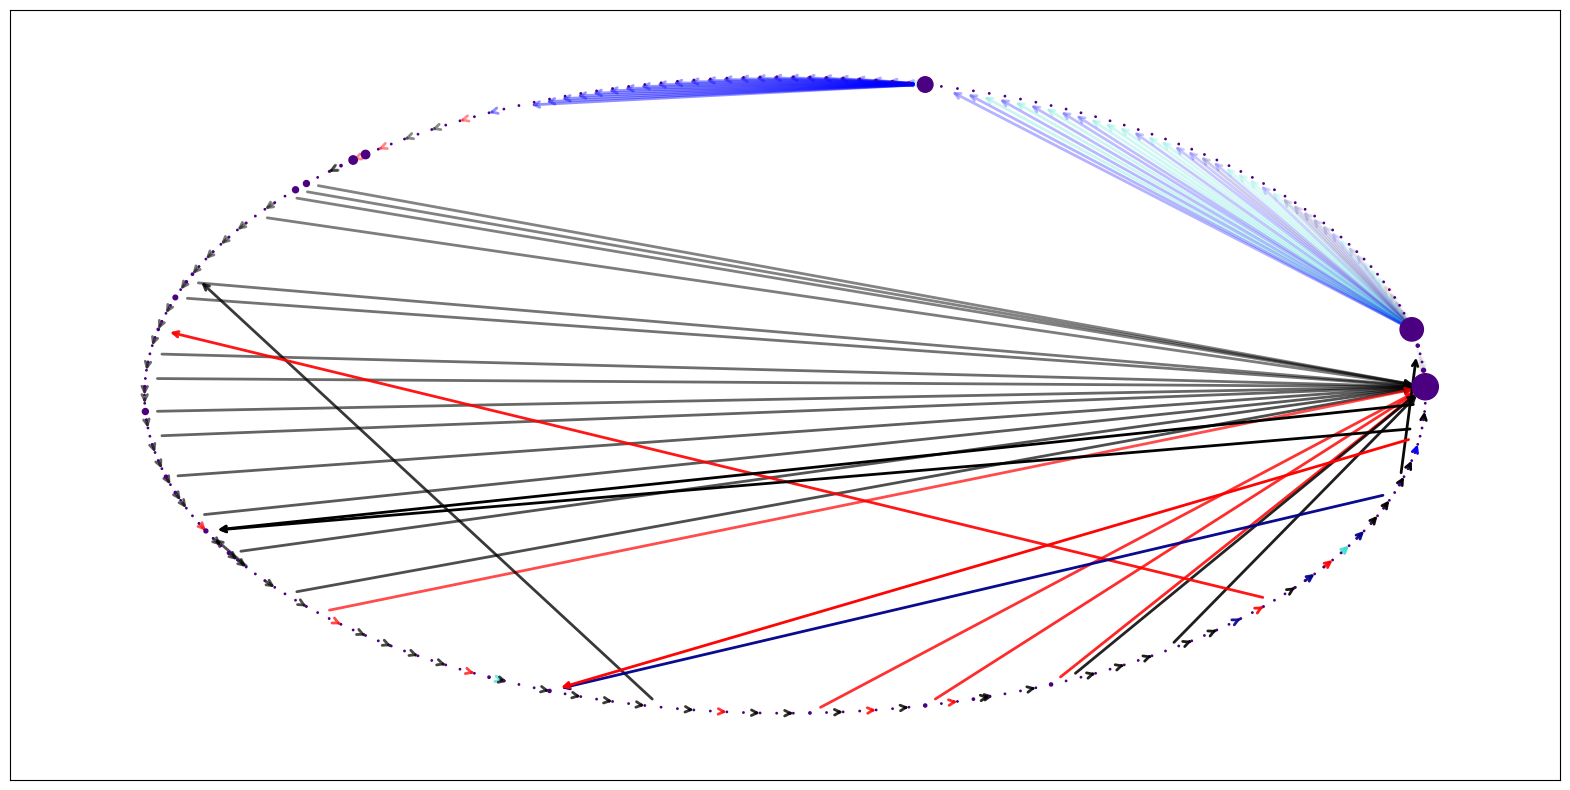

In [86]:
seed = 13648  # Seed random number generators for reproducibility



pos = nx.circular_layout(G)
M = G.number_of_edges()
#edge_colors = range(2, M + 2)


fig, axs = plt.subplots(figsize=(20,10))
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, ax=axs,node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    #node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=new_edge_colors,
    #edge_cmap=cmap,
    #edge_vmin=min(edge_colors),
    #edge_vmax=max(edge_colors),
    ax=axs,
    width=2,
)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
#pc.set_array(edge_colors)

#ax = plt.gca()
#ax.set_axis_off()
#plt.colorbar(pc, ax=ax)
plt.show()

In [51]:
edge_colors

range(2, 177)

In [11]:

# Group by 'to_address' to get credit counts and values
credits = transactions_df.groupby('to_address').agg(
    credit_count=('ether_value', 'count'),      # Number of credits received
    credit_value=('ether_value', 'sum'),        # Total ether value credited
    unique_senders=('from_address', 'nunique')  # Count of unique addresses sending ether
).reset_index()

# Group by 'from_address' to get debit counts, values, and nonce statistics
debits = transactions_df.groupby('from_address').agg(
    debit_count=('ether_value', 'count'),        # Number of debits sent
    debit_value=('ether_value', 'sum'),          # Total ether value debited
    unique_receivers=('to_address', 'nunique'),  # Count of unique addresses ether was sent to
    min_nonce=('nonce', 'min'),                  # Minimum nonce
    max_nonce=('nonce', 'max')                   # Maximum nonce
).reset_index()

# Combine the two dataframes (credits and debits) into a single dataframe, merging on address
# Since one address could appear as both from_address (debits) and to_address (credits), use an outer merge.
result_df = pd.merge(debits, credits, left_on='from_address', right_on='to_address', how='outer')

# Rename the columns for consistency and clarity
result_df.rename(columns={
    'from_address': 'address',     # Rename to a single "address" column
    'credit_count': 'credit_count',
    'credit_value': 'credit_value',
    'unique_senders': 'unique_senders',
    'debit_count': 'debit_count',
    'debit_value': 'debit_value',
    'unique_receivers': 'unique_receivers',
    'min_nonce': 'min_nonce',
    'max_nonce': 'max_nonce'
}, inplace=True)

result_df['address'] = result_df['address'].fillna(-1)
result_df['address'] = result_df.apply(lambda x: x['address'] if x['address'] != -1 else x['to_address'], axis=1)
result_df.drop(columns='to_address', inplace=True)
# Fill any NaN values resulting from the outer merge with zeros (for counts/values) or appropriate defaults
result_df[['credit_count', 'credit_value', 'unique_senders', 'debit_count', 'debit_value', 'unique_receivers']] = result_df[['credit_count', 'credit_value', 'unique_senders', 'debit_count', 'debit_value', 'unique_receivers']].fillna(0)

# Display the result
print(result_df.shape)

result_df.head()


(548722, 9)


,address,debit_count,debit_value,unique_receivers,min_nonce,max_nonce,credit_count,credit_value,unique_senders
0,0x0000000000000000000000000000000000000000,0.0,0.0,0.0,NaN,NaN,95.0,0.0,10.0
1,0x000000000000000000000063616e63656c6c6564,0.0,0.0,0.0,NaN,NaN,1.0,0.0,1.0
2,0x000000000000541e251335090ac5b47176af4f7e,0.0,0.0,0.0,NaN,NaN,163.0,54.5,6.0
3,0x0000000000013949f288172bd7e36837bddc7211,0.0,0.0,0.0,NaN,NaN,7.0,0.0,1.0
4,0x0000000000075efbee23fe2de1bd0b7690883cc9,0.0,0.0,0.0,NaN,NaN,27.0,0.0,2.0


In [12]:
result_df.describe(include='all')

,address,debit_count,debit_value,unique_receivers,min_nonce,max_nonce,credit_count,credit_value,unique_senders
count,548722,548722.000000,548722.000000,548722.000000,4.476010e+05,4.476010e+05,548722.000000,548722.000000,548722.000000
unique,548722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0xffffe7d8929f2634400ef41d4f49f76fd3dd236f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.474996,6.964703,1.473688,4.011441e+02,4.044041e+02,3.464849,6.964698,1.473688
std,NaN,114.164006,423.561971,69.381056,4.815376e+04,4.822483e+04,395.367229,418.917925,129.856907
min,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,NaN,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,NaN,1.000000,0.000000,1.000000,2.000000e+00,3.000000e+00,1.000000,0.002340,1.000000
75%,NaN,1.000000,0.049958,1.000000,2.100000e+01,2.200000e+01,1.000000,0.100000,1.000000


In [13]:
result_df.sample(23)

,address,debit_count,debit_value,unique_receivers,min_nonce,max_nonce,credit_count,credit_value,unique_senders
532697,0xf85a1d585e8f9660e9c164dbab53bd2c0c4cc7f3,1.0,0.209714,1.0,168.0,168.0,2.0,0.140213,1.0
271669,0x7d393c75106e5eef4a5f91ddda52a0164f5ff395,1.0,32.902000,1.0,0.0,0.0,1.0,32.902063,1.0
39954,0x11e714c769350b1bfd9fcd4da759722397ba792a,0.0,0.000000,0.0,NaN,NaN,1.0,0.010000,1.0
172202,0x4eeea84924a803976aea5640235e323c580ccadc,3.0,0.000000,1.0,0.0,2.0,2.0,0.006000,1.0
526483,0xf55c6cab3781c94db65f55cfbe3f6eb0f83f397d,0.0,0.000000,0.0,NaN,NaN,1.0,0.000000,1.0
138419,0x3f739b4881bf5c9c1ff896d348f84c6f40a8dfce,1.0,0.000945,1.0,0.0,0.0,0.0,0.000000,0.0
91633,0x29bd83ffdb67b5c97102d2dc99585b582255a382,1.0,0.000000,1.0,3.0,3.0,1.0,0.000117,1.0
49087,0x1606c2d5dbe2bf4293dfb1ba2bfc736889bb50c1,0.0,0.000000,0.0,NaN,NaN,1.0,7.400000,1.0
36622,0x106759643668c425687e14eea00f44e2e3feb014,1.0,0.000000,1.0,4.0,4.0,0.0,0.000000,0.0
310625,0x8f7e51d7487ebdcb9d729079074d8778e06c280a,0.0,0.000000,0.0,NaN,NaN,48.0,0.000000,19.0


In [14]:
# lets see who are the big receivers of funds
result_df.sort_values(by='debit_count', ascending=False).head(23)

,address,debit_count,debit_value,unique_receivers,min_nonce,max_nonce,credit_count,credit_value,unique_senders
525757,0xf509accd096a82ef2562d316669d0aa4b60f3796,40887.0,381.640000,35460.0,16025.0,56911.0,5.0,680.000000,3.0
503313,0xea674fdde714fd979de3edf0f56aa9716b898ec8,38912.0,8050.323448,30210.0,23839256.0,23878167.0,0.0,0.000000,0.0
361068,0xa71c8bae673f99ac6c0f32c56efc89a8ddb9a501,22430.0,0.000000,1.0,407894.0,430323.0,1.0,20.000000,1.0
180448,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,16987.0,2874.827244,10361.0,14107810.0,14124796.0,0.0,0.000000,0.0
249899,0x734ac651dd95a339c633cded410228515f97faff,13246.0,7.921875,12256.0,394402.0,407647.0,0.0,0.000000,0.0
333908,0x9a75eabb817b9cbff16d84c18dbb2dadb18309c6,13119.0,6.002789,2.0,215089.0,228207.0,1.0,13.481177,1.0
358037,0xa5a3903fc3698c241b1385df4f80a5c665f47404,12983.0,187.215346,612.0,110428.0,123410.0,0.0,0.000000,0.0
224287,0x6748f50f686bfbca6fe8ad62b22228b87f31ff2b,10964.0,0.000000,79.0,405500.0,416463.0,0.0,0.000000,0.0
36581,0x1062a747393198f70f71ec65a582423dba7e5ab3,10662.0,0.000000,73.0,394071.0,404732.0,0.0,0.000000,0.0
302471,0x8babf0ba311aab914c00e8fda7e8558a8b66de5d,10235.0,2.441000,14.0,114763.0,124997.0,7.0,2.357600,7.0
